# Adam's Udacity Data Science Blog Post Project

This notebook was made to explore Seattle AirBnB data retrieved from Inside AirBnB July 18 2023 as part of the Blog Post Project of the Udacity Data Scientist Nanodegree. 

For the README, data sources, and other information related to this project, please see [the corresponding github repo](https://github.com/epistemetrica/udacity-blog-post-project). 

In [1]:
#install libraries
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import folium 

## Inspecting the data

Let's take a look at the data, starting by loading into pandas dataframes, inspecting the first few rows, and looking at the info for each dataframe. 

In [2]:
#load csv files into dfs
calendar_df = pd.read_csv('airbnb_data_seattle/calendar.csv')
listings_df = pd.read_csv('airbnb_data_seattle/listings.csv')
reviews_df = pd.read_csv('airbnb_data_seattle/reviews.csv')


In [3]:
#inspect calendar data
display(calendar_df.head())
calendar_df.info()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,6606,2023-06-24,f,$99.00,$99.00,30.0,1125.0
1,6606,2023-06-25,f,$99.00,$99.00,30.0,1125.0
2,6606,2023-06-26,f,$99.00,$99.00,30.0,1125.0
3,6606,2023-06-27,f,$99.00,$99.00,30.0,1125.0
4,6606,2023-06-28,f,$99.00,$99.00,30.0,1125.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2421778 entries, 0 to 2421777
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 129.3+ MB


Wait. A 30-night minimum is odd for AirBnB, right? Let's take a deeper look at that column.  

In [4]:
display(calendar_df.minimum_nights.describe())
print('The most common minimum is {} nights, and the median minimum is {} nights.'.format(max(calendar_df.minimum_nights.mode()), calendar_df.minimum_nights.median()))

count    2.421777e+06
mean     3.160028e+01
std      8.415235e+01
min      1.000000e+00
25%      2.000000e+00
50%      3.000000e+00
75%      3.000000e+01
max      3.660000e+02
Name: minimum_nights, dtype: float64

The most common minimum is 2.0 nights, and the median minimum is 3.0 nights.


OK, that's about what we'd expect for AirBnB rentals. That first listing in the calendar data is odd indeed! But nothing seems to be structurally wrong with our data. Moving along... 

In [5]:
#inspect listings data
pd.set_option('display.max_columns', None) #removes limit on number of displayed columns
display(listings_df.head())
listings_df.info()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,13226114,https://www.airbnb.com/rooms/13226114,20230624173239,2023-06-25,city scrape,Home in Seattle · ★4.79 · 2 bedrooms · 4 beds ...,"Explore Columbia City's lively culinary, bar ...",Columbia City's diverse restaurants and locall...,https://a0.muscache.com/pictures/miso/Hosting-...,1884549,https://www.airbnb.com/users/show/1884549,Denise & Sean,2012-03-08,"Seattle, WA","We enjoy hiking, volleyball, culinary adventur...",NaN,NaN,83%,t,https://a0.muscache.com/im/pictures/user/89cbb...,https://a0.muscache.com/im/pictures/user/89cbb...,Columbia City,1,2,"['email', 'phone', 'work_email']",t,t,"Seattle, Washington, United States",Columbia City,Rainier Valley,47.56555,-122.29385,Entire home,Entire home/apt,5,NaN,2 baths,2.0,4.0,"[""Private patio or balcony"", ""Ceiling fan"", ""B...",$240.00,4,200,4.0,7.0,22.0,200.0,4.1,189.5,NaN,t,9,9,9,9,2023-06-25,24,5,0,2016-06-19,2022-12-01,4.79,4.92,4.83,5.00,5.00,4.61,4.65,STR-OPLI-19-000171,f,1,1,0,0,0.28
1,12518952,https://www.airbnb.com/rooms/12518952,20230624173239,2023-06-25,city scrape,Guest suite in Seattle · ★5.0 · 2 bedrooms · 6...,"Newly painted, beautiful, bright and wonderfu...","Many good restaurants and cafés, bathhouse the...",https://a0.muscache.com/pictures/9ff506f6-8927...,12677600,https://www.airbnb.com/users/show/12677600,Joe,2014-02-28,"Seattle, WA","I enjoy travel, languages and am curious of cu...",within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/69ec4...,https://a0.muscache.com/im/pictures/user/69ec4...,NaN,1,1,"['email', 'phone']",t,t,"Seattle, Washington, United States",Green Lake,Other neighborhoods,47.68243,-122.33086,Entire guest suite,Entire home/apt,4,NaN,1 bath,2.0,6.0,"[""45\"" HDTV with Netflix, HBO Max, Hulu, Amazo...",$200.00,3,1125,3.0,7.0,1125.0,1125.0,3.8,1125.0,NaN,t,1,3,24,113,2023-06-25,60,9,1,2016-07-02,2023-06-13,5.00,4.98,4.98,4.98,5.00,5.00,4.83,STR-OPLI-19-002061,f,1,1,0,0,0.71
2,521597880867717063,https://www.airbnb.com/rooms/521597880867717063,20230624173239,2023-06-24,city scrape,Serviced apartment in Seattle · Studio · 1 bath,Centrally located in the Adams neighborhood of...,NaN,https://a0.muscache.com/pictures/prohost-api/H...,48005494,https://www.airbnb.com/users/show/48005494,Zeus,2015-11-02,"San Francisco, CA",We built Zeus Living so you can feel at home w...,within an hour,99%,97%,f,https://a0.muscache.com/im/pictures/user/c4bea...,https://a0.muscache.com/im/pictures/user/c4bea...,Redwood City,750,1988,"['email', 'phone', 'work_email']",t,t,NaN,Adams,Ballard,47.66646,-122.37650,Entire serviced apartment,Entire home/apt,2,NaN,1 bath,NaN,NaN,"[""Dryer \u2013\u00a0In unit"", ""Carbon monoxide...",$81.00,30,731,30.0,30.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6636 non-null   int64  
 1   listing_url                                   6636 non-null   object 
 2   scrape_id                                     6636 non-null   int64  
 3   last_scraped                                  6636 non-null   object 
 4   source                                        6636 non-null   object 
 5   name                                          6636 non-null   object 
 6   description                                   6630 non-null   object 
 7   neighborhood_overview                         4859 non-null   object 
 8   picture_url                                   6636 non-null   object 
 9   host_id                                       6636 non-null   i

In [6]:
#inspect reviews data
display(reviews_df.head())
reviews_df.info()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,6606,5664,2009-07-17,18085,Vivian,"The Urban Cottage is comfortable, beautiful, f..."
1,6606,338761,2011-06-27,434031,Elliott,Joyce was a wonderful host and the urban cotta...
2,6606,467904,2011-08-22,976182,Allegra,Beautiful cottage and warm hospitality from Jo...
3,6606,480017,2011-08-27,997921,Brittney,"Joyce is a wonderful host! She is warm, helpfu..."
4,6606,487278,2011-08-30,206901,Pascal,Joyce's cottage is the perfect Seattle locatio...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425070 entries, 0 to 425069
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     425070 non-null  int64 
 1   id             425070 non-null  int64 
 2   date           425070 non-null  object
 3   reviewer_id    425070 non-null  int64 
 4   reviewer_name  425070 non-null  object
 5   comments       424998 non-null  object
dtypes: int64(3), object(3)
memory usage: 19.5+ MB


## Cleaning and General Data Prep

The basic structure of the data set is quite tidy, but there are some small inconveniences. For instance, the price columns are strings rather than a numerical type, etc. Let's clean up these issues in place so that we don't have to think about them later. 

In [7]:
#recast price strings as floats. 
listings_df['price'] = listings_df['price'].str.replace('$','').str.replace(',','').astype('float')
calendar_df['price'] = calendar_df['price'].str.replace('$','').str.replace(',','').astype('float')
calendar_df['adjusted_price'] = calendar_df['adjusted_price'].str.replace('$','').str.replace(',','').astype('float')

In [8]:
#recast date strings to datetime type
listings_df['host_since'] = pd.to_datetime(listings_df['host_since'])
listings_df['first_review'] = pd.to_datetime(listings_df['first_review'])
listings_df['last_review'] = pd.to_datetime(listings_df['last_review'])
calendar_df['date'] = pd.to_datetime(calendar_df['date'])
reviews_df['date'] = pd.to_datetime(reviews_df['date'])

In [9]:
#recast ('t','f') strings to boolean 
listings_df['host_is_superhost'] = listings_df['host_is_superhost'].map({'t': True,'f': False})
listings_df['host_has_profile_pic'] = listings_df['host_has_profile_pic'].map({'t': True,'f': False})
listings_df['host_identity_verified'] = listings_df['host_identity_verified'].map({'t': True,'f': False})
calendar_df['available'] = calendar_df['available'].map({'t': True, 'f': False})


The data on bathrooms for each listing is messy&mdash;the 'bathrooms' column is empty, and the 'bathrooms_text' column includes various entries such as "1 shared bath" or "Private half-bath." Since there are only 28 unique strings in the 'bathrooms_text' column, I chose a brute force mapping approach rather than building a function to interpret the various responses. 

In [10]:
#obtain unique entries in the 'bathroom_text' col
listings_df['bathrooms_text'].unique();

#map values from 'bathrooms_text' into 'bathrooms' as numerical values
listings_df['bathrooms'] = listings_df['bathrooms_text'].map({'2 baths': 2, '1 bath': 1, '1 shared bath': 1, '1 private bath': 1,
       '2.5 baths': 2.5, '3.5 baths': 3.5, '3 baths': 3, '4 baths': 4, '1.5 baths': 1.5,
       '2 shared baths': 2, '4.5 baths': 4.5, 'Half-bath': 0.5, '0 shared baths': 0,
       '3 shared baths': 3, '4 shared baths': 4, '3.5 shared baths': 3.5,
       '1.5 shared baths': 1.5, 'Private half-bath': 0.5, '6 baths': 6,
       '16 shared baths': 16, '0 baths': 0, '6.5 baths': 6.5, '5 baths': 5,
       '2.5 shared baths': 2.5, 'Shared half-bath': 0.5, '7 baths': 7, '5.5 baths': 5.5})

Some listings seem a bit spurious. For instance, a single host represents all the listings above $5,000 (4 of which are at the same location and listed at $10,000.00), and all their listings have extravagant prices for normal-looking listings. I drop this host, as well as listings with a price of $0. 

In [11]:
#drop spurious host id
listings_df = listings_df.drop(listings_df[listings_df.host_id == 241568755].index)

#drop $0 listings
listings_df = listings_df.drop(listings_df[listings_df.price == 0].index)

## Exploratory analysis

Boring part done, now for the fun! 

First, I'd like to look at how prices compare in different neighborhoods, or rather _neighbourhoods_ 'cause Inside AirBnB was founded by an Aussie ;)

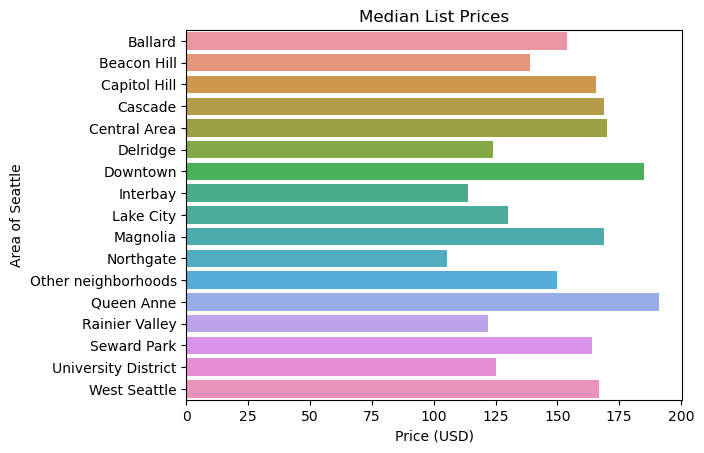

In [15]:
#obtain median values by neighborhood 
df = listings_df[['neighbourhood_group_cleansed','price']].groupby('neighbourhood_group_cleansed', as_index=False).median()

#plot in seaborn
p = sns.barplot(y= 'neighbourhood_group_cleansed', x= 'price', data=df)
p.set(ylabel='Area of Seattle', xlabel='Price (USD)', title= 'Median List Prices');

Great! There's quite a bit of variance in price between the neighborhoods, at least in terms of median prices. Let's see if we can get a better feel for what's going on. 

Another way to visualize this is to look at prices on a map. As a first step, let's look at the same neighborhood-level data show geographically. 

In [16]:
#import libraries
import geopandas as gpd
import folium